**Hands-on Workshop: Deep Learning for Computer Vision**

**March 2019**

**Instructor: Santosh Chapaneri**

*   The Fashion MNIST database has a database of fashion accessories.

*   Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning Algorithms. Han Xiao, Kashif Rasul, Roland Vollgraf. arXiv:1708.07747, 2017.

*   The training set has  60,000  samples. The test set has  10,000  samples.

*   The fashion accessories are size-normalized and centered in a fixed-size image.

*   We will train Multi-layer Perceptron, Deep Multi-layer Perceptron and CNN classifier using Keras for Fashion MNIST dataset.

In [0]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

In [0]:
# Load the fashion-mnist pre-shuffled train data and test data
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.fashion_mnist.load_data()


4423680/4422102 [==============================] - 0s 0us/step


In [0]:
# Print training set shape 
print("X_train shape:", X_train.shape, "Y_train shape:", Y_train.shape)

X_train shape: (60000, 28, 28) Y_train shape: (60000,)


** Visualize the data**

Y = 0 T-shirt/top
[[  0   0   0   0   0   0   0   0   0   0 120  54   0   0   0   0  13 124
    0   0   0   0   2   0   0   0   0   0]
 [  0   0   0   0   0   0   0  64 173 207 218 206 232 184 168 202 205 218
  202 126  12   0   0   1   0   0   0   0]
 [  0   0   0   0   0  56 199 223 222 207 205 211 223 227 231 230 214 203
  209 220 213 164   0   0   2   0   0   0]
 [  0   0   0   0   0 191 219 200 200 206 206 205 206 206 203 202 201 202
  201 195 198 222 149   0   0   0   0   0]
 [  0   0   0   0  72 224 201 205 208 202 204 204 205 205 208 205 192 188
  203 202 200 189 198  23   0   0   0   0]
 [  0   0   0   0 160 221 211 200 204 203 204 203 201 202 201 203 201 185
  203 203 188 194 207 126   0   0   0   0]
 [  0   0   0   0 227 212 224 205 201 204 203 202 202 201 201 200 201 195
  198 191 182 199 202 202   0   0   0   0]
 [  0   0   0  20 208 205 224 219 201 200 202 202 201 201 199 198 199 199
  197 183 195 210 191 189  11   0   0   0]
 [  0   0   0 138 223 201 218 229 216 202 202 

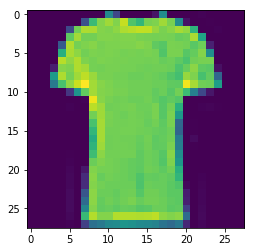

In [0]:
# Define the labels
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9

# Image index, you can pick any number between 0 and 59,999
img_index = 5999

# y_train contains the lables, ranging from 0 to 9
label_index = Y_train[img_index]

# Print the label, for example 2 Pullover
print ("Y = " + str(label_index) + " " +(fashion_mnist_labels[label_index]))


# # Show one of the images from the training dataset
plt.imshow(X_train[img_index])

In [0]:
img_rows, img_cols = 28,28

# MLP
X_train_mlp = X_train.reshape(X_train.shape[0], img_rows*img_cols)
Y_train_mlp = Y_train
X_test_mlp = X_test.reshape(X_test.shape[0], img_rows*img_cols)
Y_test_mlp =Y_test

# CNN
X_train_cnn = X_train.reshape(X_train.shape[0], img_rows,img_cols,1)
Y_train_cnn = Y_train
X_test_cnn = X_test.reshape(X_test.shape[0], img_rows,img_cols,1)
Y_test_cnn = Y_test

In [0]:
print(X_train_mlp.shape)
print(X_train_cnn.shape)
print(Y_train_mlp.shape)
print(Y_train_cnn.shape)

(60000, 784)
(60000, 28, 28, 1)
(60000,)
(60000,)


In [0]:
X_train_mlp = X_train_mlp.astype('float32')
X_test_mlp = X_test_mlp.astype('float32')
X_train_mlp /= 255
X_test_mlp /= 255

X_train_cnn = X_train_cnn.astype('float32')
X_test_cnn = X_test_cnn.astype('float32')
X_train_cnn /= 255
X_test_cnn /= 255

In [0]:
# Convert class vectors to binary class matrices
num_classes = 10

Y_train_mlp = keras.utils.to_categorical(Y_train_mlp, num_classes)
Y_test_mlp = keras.utils.to_categorical(Y_test_mlp, num_classes)

Y_train_cnn = keras.utils.to_categorical(Y_train_cnn, num_classes)
Y_test_cnn = keras.utils.to_categorical(Y_test_cnn, num_classes)

In [0]:
print(Y_train_cnn.shape)
Y_train_cnn[:5,:]

(60000, 10)


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
# Split data to optimize classifier during training
X_train_mlp, X_val_mlp, Y_train_mlp, Y_val_mlp = train_test_split(X_train_mlp,Y_train_mlp,test_size=0.2)

X_train_cnn, X_val_cnn, Y_train_cnn, Y_val_cnn = train_test_split(X_train_cnn,Y_train_cnn,test_size=0.2)

In [0]:
print(X_train_mlp.shape)
print(X_val_mlp.shape)

print(X_train_cnn.shape)
print(X_val_cnn.shape)

(48000, 784)
(12000, 784)
(48000, 28, 28, 1)
(12000, 28, 28, 1)


**Multi Layer Perceptron**

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.datasets import mnist
from keras.utils import np_utils

In [0]:
# Multilayer Perceptron model

batch_size = 256
num_epochs = 50

model = Sequential()

model.add(Dense(input_dim=784, activation='sigmoid', 
                units=625, kernel_initializer='normal'))

model.add(Dense(input_dim=625, activation='softmax', 
                units=10, kernel_initializer='normal'))

model.compile(optimizer=SGD(lr=0.05), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

W0828 15:47:49.654829 140139242628992 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0828 15:47:49.706316 140139242628992 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0828 15:47:49.718126 140139242628992 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4115: The name tf.random_normal is deprecated. Please use tf.random.normal instead.

W0828 15:47:49.760864 140139242628992 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0828 15:47:49.776371 140139242628992 deprecation_wrapper.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 625)               490625    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                6260      
Total params: 496,885
Trainable params: 496,885
Non-trainable params: 0
_________________________________________________________________


In [0]:
history = model.fit(X_train_mlp, Y_train_mlp,
          batch_size = batch_size,
          epochs = num_epochs,
          verbose = 1,
          validation_data = (X_val_mlp,Y_val_mlp))

W0828 15:48:07.317878 140139242628992 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0828 15:48:07.370573 140139242628992 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 6s 116us/step - loss: 1.3924 - acc: 0.6218 - val_loss: 0.9980 - val_acc: 0.7114
Epoch 2/50
48000/48000 [==============================] - 1s 21us/step - loss: 0.8599 - acc: 0.7337 - val_loss: 0.7936 - val_acc: 0.7281
Epoch 3/50
48000/48000 [==============================] - 1s 21us/step - loss: 0.7333 - acc: 0.7537 - val_loss: 0.7126 - val_acc: 0.7546
Epoch 4/50
48000/48000 [==============================] - 1s 21us/step - loss: 0.6725 - acc: 0.7683 - val_loss: 0.6706 - val_acc: 0.7571
Epoch 5/50
48000/48000 [==============================] - 1s 21us/step - loss: 0.6330 - acc: 0.7798 - val_loss: 0.6295 - val_acc: 0.7824
Epoch 6/50
48000/48000 [==============================] - 1s 20us/step - loss: 0.6045 - acc: 0.7894 - val_loss: 0.6206 - val_acc: 0.7730
Epoch 7/50
48000/48000 [==============================] - 1s 21us/step - loss: 0.5817 - acc: 0.7974 - val_loss: 0.5878 - val_ac

In [0]:
score = model.evaluate(X_test_mlp, Y_test_mlp, verbose = 1)
print()
print('MLP Test loss:', score[0])
print('MLP Test accuracy:', score[1])

10000/10000 [==============================] - 0s 45us/step

MLP Test loss: 0.45125982646942137
MLP Test accuracy: 0.8399


**Deep Multi Layer Perceptron**

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import RMSprop
from keras.datasets import mnist
from keras.utils import np_utils

In [0]:
# Deep Multilayer Perceptron model
model_deepmlp = Sequential()

model_deepmlp.add(Dense(input_dim=784, units=625, kernel_initializer='normal'))
model_deepmlp.add(Activation('relu'))
model_deepmlp.add(Dropout(0.2))

model_deepmlp.add(Dense(input_dim=625, units=625, kernel_initializer='normal'))
model_deepmlp.add(Activation('relu'))
model_deepmlp.add(Dropout(0.2))

model_deepmlp.add(Dense(input_dim=625, units=625, kernel_initializer='normal'))
model_deepmlp.add(Activation('relu'))
model_deepmlp.add(Dropout(0.2))

model_deepmlp.add(Dense(input_dim=625, units=10, kernel_initializer='normal'))
model_deepmlp.add(Activation('softmax'))

model_deepmlp.compile(optimizer=RMSprop(lr=0.001, rho=0.9), 
              loss='categorical_crossentropy', metrics=['accuracy'])

model_deepmlp.summary()

W0828 15:50:15.229695 140139242628992 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 625)               490625    
_________________________________________________________________
activation_1 (Activation)    (None, 625)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 625)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 625)               391250    
_________________________________________________________________
activation_2 (Activation)    (None, 625)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 625)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 625)               391250    
__________

In [0]:
history_deepmlp = model_deepmlp.fit(X_train_mlp, Y_train_mlp,
                                    batch_size = batch_size,
                                    epochs = num_epochs,
                                    verbose = 1,
                                    validation_data = (X_val_mlp,Y_val_mlp))

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 2s 42us/step - loss: 0.6946 - acc: 0.7525 - val_loss: 0.5352 - val_acc: 0.8074
Epoch 2/50
48000/48000 [==============================] - 2s 38us/step - loss: 0.4521 - acc: 0.8335 - val_loss: 0.4597 - val_acc: 0.8266
Epoch 3/50
48000/48000 [==============================] - 2s 38us/step - loss: 0.3963 - acc: 0.8527 - val_loss: 0.4528 - val_acc: 0.8432
Epoch 4/50
48000/48000 [==============================] - 2s 38us/step - loss: 0.3709 - acc: 0.8642 - val_loss: 0.4054 - val_acc: 0.8585
Epoch 5/50
48000/48000 [==============================] - 2s 38us/step - loss: 0.3456 - acc: 0.8711 - val_loss: 0.3962 - val_acc: 0.8617
Epoch 6/50
48000/48000 [==============================] - 2s 38us/step - loss: 0.3298 - acc: 0.8766 - val_loss: 0.3820 - val_acc: 0.8549
Epoch 7/50
48000/48000 [==============================] - 2s 38us/step - loss: 0.3193 - acc: 0.8814 - val_loss: 0.3988 - val_acc

In [0]:
score = model_deepmlp.evaluate(X_test_mlp, Y_test_mlp, verbose = 1)
print()
print('Deep MLP Test loss:', score[0])
print('Deep MLP Test accuracy:', score[1])

10000/10000 [==============================] - 1s 57us/step

Deep MLP Test loss: 0.48536161994636057
Deep MLP Test accuracy: 0.885


**Convolutional Neural Networks**

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D

Using TensorFlow backend.


In [7]:
img_rows, img_cols = 28,28
num_classes = 10
input_shape = (img_rows,img_cols,1)

model_cnn = Sequential()
model_cnn.add(Conv2D(32, (3,3), activation='relu',kernel_initializer='normal', input_shape=input_shape))
model_cnn.add(MaxPooling2D((2,2)))
model_cnn.add(Dropout(0.25))

model_cnn.add(Conv2D(64, (3,3), activation='relu'))
model_cnn.add(MaxPooling2D((2,2)))
model_cnn.add(Dropout(0.25))

model_cnn.add(Conv2D(128, (3,3), activation='relu'))
model_cnn.add(Dropout(0.4))

model_cnn.add(Flatten())

model_cnn.add(Dense(128, activation='relu'))
model_cnn.add(Dropout(0.3))

model_cnn.add(Dense(num_classes, activation='softmax'))

model_cnn.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

model_cnn.summary()



Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 3, 3, 128)      

In [0]:
history_cnn = model_cnn.fit(X_train_cnn, Y_train_cnn,
                            batch_size = batch_size,
                            epochs = num_epochs,
                            verbose = 1,
                            validation_data = (X_val_cnn,Y_val_cnn))

Train on 60000 samples, validate on 12000 samples
Epoch 1/50
60000/60000 [==============================] - 6s 93us/step - loss: 0.8327 - acc: 0.6839 - val_loss: 0.4899 - val_acc: 0.8149
Epoch 2/50
60000/60000 [==============================] - 4s 75us/step - loss: 0.5142 - acc: 0.8071 - val_loss: 0.3932 - val_acc: 0.8554
Epoch 3/50
60000/60000 [==============================] - 5s 75us/step - loss: 0.4376 - acc: 0.8392 - val_loss: 0.3484 - val_acc: 0.8732
Epoch 4/50
60000/60000 [==============================] - 5s 75us/step - loss: 0.3910 - acc: 0.8559 - val_loss: 0.3099 - val_acc: 0.8859
Epoch 5/50
60000/60000 [==============================] - 5s 76us/step - loss: 0.3662 - acc: 0.8646 - val_loss: 0.2824 - val_acc: 0.8989
Epoch 6/50
60000/60000 [==============================] - 5s 75us/step - loss: 0.3435 - acc: 0.8740 - val_loss: 0.2639 - val_acc: 0.9043
Epoch 7/50
60000/60000 [==============================] - 5s 75us/step - loss: 0.3277 - acc: 0.8803 - val_loss: 0.2521 - val_acc

In [0]:
X_test_cnn.shape

(10000, 28, 28, 1)

In [0]:
score = model_cnn.evaluate(X_test_cnn, Y_test_cnn, verbose = 1)
print()
print('CNN Test loss:', score[0])
print('CNN Test accuracy:', score[1])

10000/10000 [==============================] - 1s 93us/step

CNN Test loss: 0.2159658547580242
CNN Test accuracy: 0.9243


**Results**

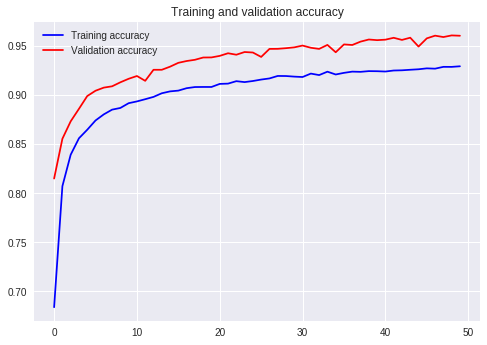

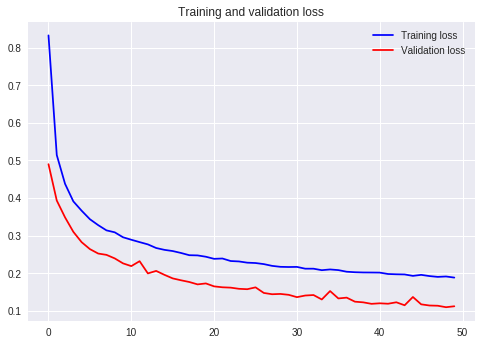

In [0]:
accuracy = history_cnn.history['acc']
val_accuracy = history_cnn.history['val_acc']

loss = history_cnn.history['loss']
val_loss = history_cnn.history['val_loss']

epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

**Classification Report**

In [0]:
# Get the predictions for the test data
predicted_classes = model_cnn.predict_classes(X_test_cnn)

# Get the indices to be plotted
Y_true_cnn = Y_test
correct = np.nonzero(predicted_classes == Y_true_cnn)
incorrect = np.nonzero(predicted_classes != Y_true_cnn)

from sklearn.metrics import classification_report

target_names = ["Class {}".format(i) for i in range(num_classes)]

print(classification_report(Y_true_cnn, predicted_classes, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.89      0.87      0.88      1000
     Class 1       0.99      0.98      0.98      1000
     Class 2       0.90      0.87      0.88      1000
     Class 3       0.92      0.93      0.92      1000
     Class 4       0.87      0.89      0.88      1000
     Class 5       0.99      0.97      0.98      1000
     Class 6       0.78      0.79      0.78      1000
     Class 7       0.96      0.98      0.97      1000
     Class 8       0.98      0.99      0.98      1000
     Class 9       0.97      0.97      0.97      1000

   micro avg       0.92      0.92      0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



**Subset of correctly predicted classes:**

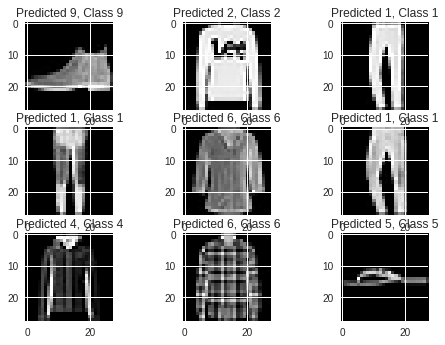

In [0]:
i=1
for j in range(9):
    plt.subplot(3,3,i)
    plt.imshow(X_test_cnn[correct[0][j]].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct[0][j]], Y_true_cnn[correct[0][j]]))
    i+=1

**Subset of incorrectly predicted classes:**

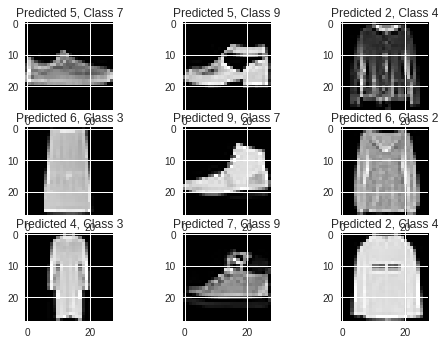

In [0]:
i=1
for j in range(9):
    plt.subplot(3,3,i)
    plt.imshow(X_test_cnn[incorrect[0][j]].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect[0][j]], Y_true_cnn[incorrect[0][j]]))
    i+=1

In [0]:
# Confusion Matrix 
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

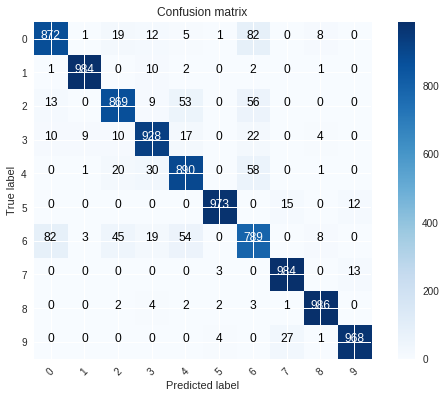

In [0]:
# Predict the values from the validation dataset
Y_pred = model_cnn.predict(X_test_cnn)

# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 

# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_test_cnn,axis = 1) 

# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true,Y_pred_classes)

# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 
